# Insurance Claims- Fraud Detection

# Overview:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


# Aim of this Project:-
In this project, we will test out several machine learning models to predict fraud_reported.

Our main goal is to predict the fraud in insurance claims and our target varibale is "fraud_reported" which is categorical in nature so this is a Binary classification problem and we will use classification algorithms to make our model.

# Steps used in this project:-
1- Define the Problem

2- Data Gathering

3- Data Cleaning

4- Data Exploration and Visualization

5- Train the algorithm

6- Evaluate our model using evaluation metrics & etc.

In [161]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [162]:
#importing dataset
df=pd.read_csv("Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [163]:
#Head of our Dataset
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [164]:
#Tail of our Dataset
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [165]:
#shape of our Dataset
print("Shape of our dataset is ",df.shape)
print("Column count in our dataset is",df.shape[1])
print("Row count in our dataset is ",df.shape[0])

Shape of our dataset is  (1000, 40)
Column count in our dataset is 40
Row count in our dataset is  1000


In [166]:
#Let's check type of data in our Dataset
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [167]:
#Checking null values in Dataset
print("Empty cells in Dataset is ",df.isna().values.any())
print("\nColumnwise Empty cell analysis\n")
print(df.isna().sum())
print("\nPlease see the detail below:-")
df.isna()

Empty cells in Dataset is  True

Columnwise Empty cell analysis

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [168]:
#Let's check our columns in detail
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [169]:
#Concise Summary of our DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [170]:
#Let's check unique values in each column to exolre dataset more deeply
print("Column-wise Unique values are as:-")
for column in df.columns.values:
    print("\n Unique values in ",column," column is " ,df[column].nunique()) 

Column-wise Unique values are as:-

 Unique values in  months_as_customer  column is  391

 Unique values in  age  column is  46

 Unique values in  policy_number  column is  1000

 Unique values in  policy_bind_date  column is  951

 Unique values in  policy_state  column is  3

 Unique values in  policy_csl  column is  3

 Unique values in  policy_deductable  column is  3

 Unique values in  policy_annual_premium  column is  991

 Unique values in  umbrella_limit  column is  11

 Unique values in  insured_zip  column is  995

 Unique values in  insured_sex  column is  2

 Unique values in  insured_education_level  column is  7

 Unique values in  insured_occupation  column is  14

 Unique values in  insured_hobbies  column is  20

 Unique values in  insured_relationship  column is  6

 Unique values in  capital-gains  column is  338

 Unique values in  capital-loss  column is  354

 Unique values in  incident_date  column is  60

 Unique values in  incident_type  column is  4

 Uniqu

In [171]:
#checking size of dataFrame
df.size

40000

In [172]:
#Lets chcek the value counts
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

05-08-1992    3
28-04-1992    3
01-01-2006    3
16-05-2008    2
07-04-1999    2
             ..
16-12-2011    1
26-03-1990    1
08-03-2009    1
29-06-2006    1
14-11-2010    1
Name: policy_bind_date, Length: 951, dtype: int64

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

reading       

In [173]:
#checking Non-numerical type data in our dataset after updation
for i in df.columns:
    if df[i].dtype=="object":
        print("Object type features in dataset: ",i)

Object type features in dataset:  policy_bind_date
Object type features in dataset:  policy_state
Object type features in dataset:  policy_csl
Object type features in dataset:  insured_sex
Object type features in dataset:  insured_education_level
Object type features in dataset:  insured_occupation
Object type features in dataset:  insured_hobbies
Object type features in dataset:  insured_relationship
Object type features in dataset:  incident_date
Object type features in dataset:  incident_type
Object type features in dataset:  collision_type
Object type features in dataset:  incident_severity
Object type features in dataset:  authorities_contacted
Object type features in dataset:  incident_state
Object type features in dataset:  incident_city
Object type features in dataset:  incident_location
Object type features in dataset:  property_damage
Object type features in dataset:  police_report_available
Object type features in dataset:  auto_make
Object type features in dataset:  auto_mo

In [174]:
#Encoding object type data in to numerical format for better processing using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i].astype(str))

In [175]:
#only null values in _c39
df.drop('_c39',axis=1,inplace=True)

In [176]:
#checking updated dataset
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,2,46980,5220,5220,36540,1,5,1998,0


# SUMMARY STATISTICS

In [177]:
#Lets describe the dataset
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [178]:
#checking Transpose of Statistical summary to get better understanding:-
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_bind_date,1000.0,4.743320e+02,2.754029e+02,0.00,233.7500,472.5,713.250,950.00
policy_state,1000.0,1.014000e+00,8.309600e-01,0.00,0.0000,1.0,2.000,2.00
policy_csl,1000.0,9.510000e-01,8.045162e-01,0.00,0.0000,1.0,2.000,2.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00


<AxesSubplot:>

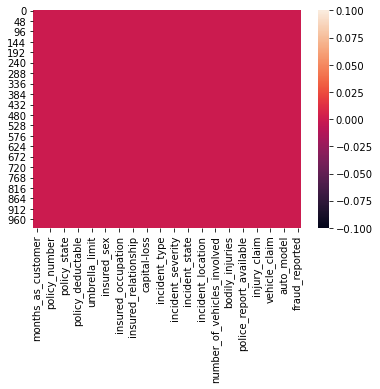

In [179]:
#To check missing values using Seaborn Heatmap
sns.heatmap(df.isnull())

Observation:-

1- Dataset has no missing values.

# Correlation Matrix

In [180]:
#Let's check correlation in our Dataset
dfcor=df.corr()
dfcor

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


<AxesSubplot:>

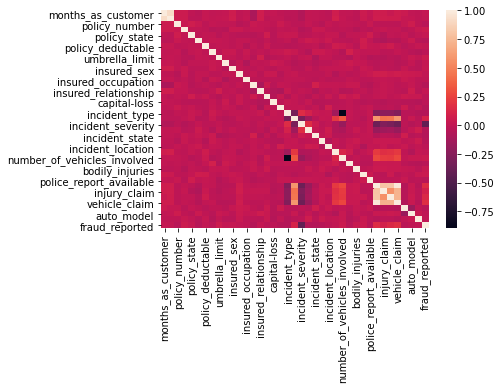

In [181]:
#checking correlation using Heatmap
sns.heatmap(dfcor)

<AxesSubplot:>

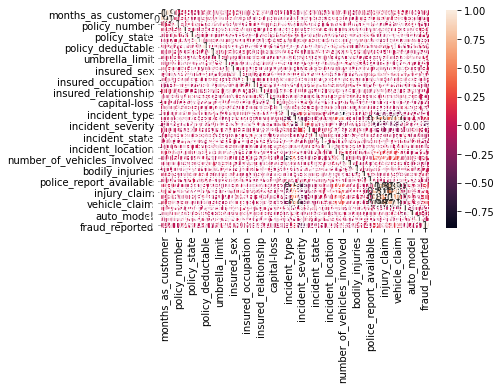

In [182]:
#Heatmap with annotations & color_palette
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,annot=True)

<AxesSubplot:>

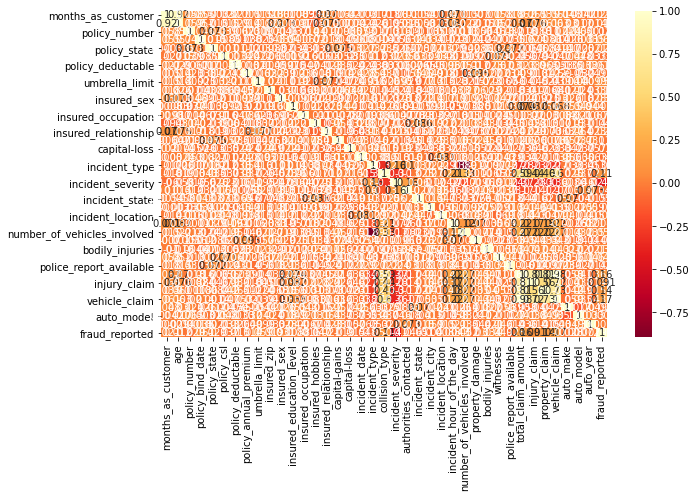

In [183]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)  

Observations:
    
1-Fraud reported is highly correlated with total_claim_amount,injury_claim,property_claim and vehicle_claim. 

2-Fraud reported is least correlated with incident_severity.

# Data Visualization

To check Distribution of Skewness

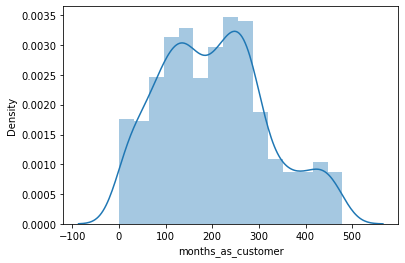

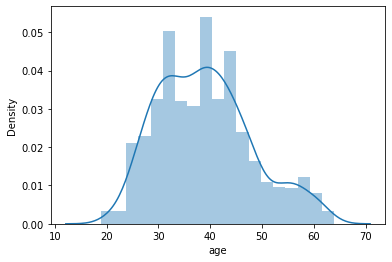

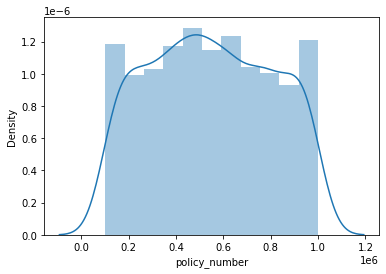

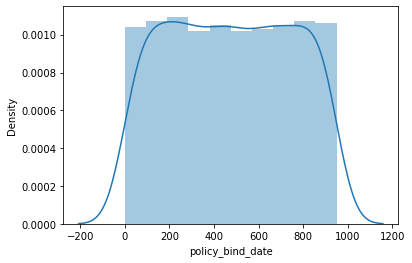

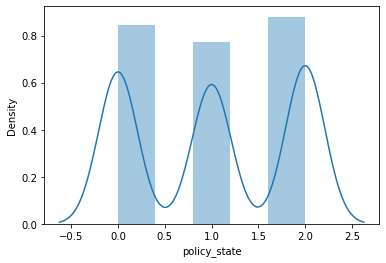

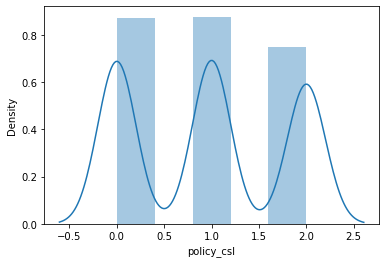

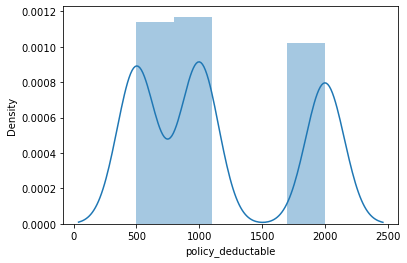

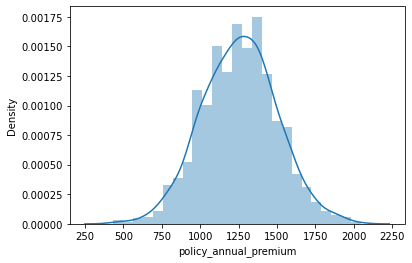

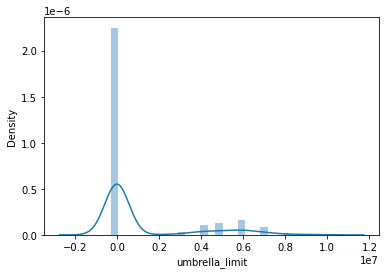

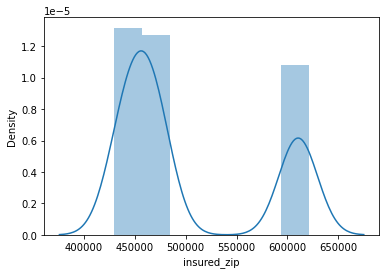

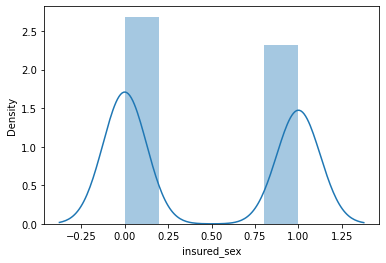

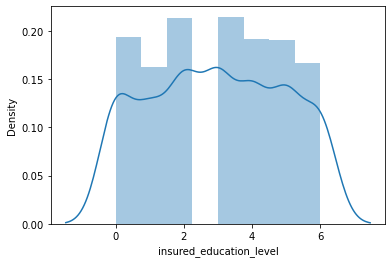

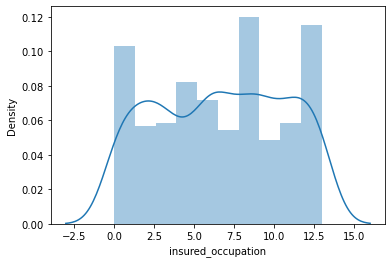

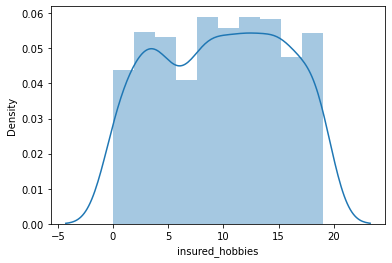

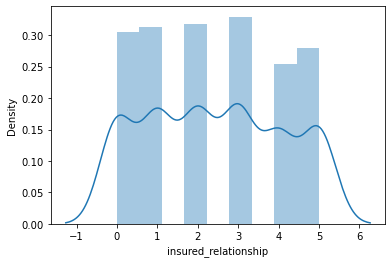

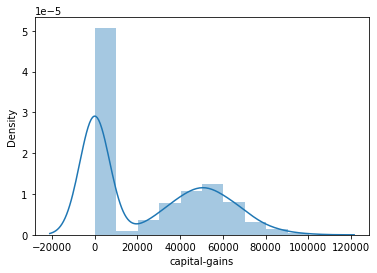

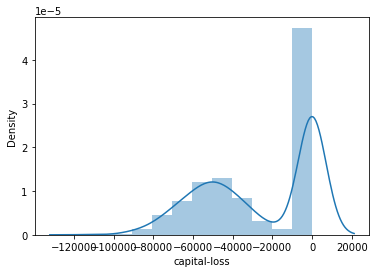

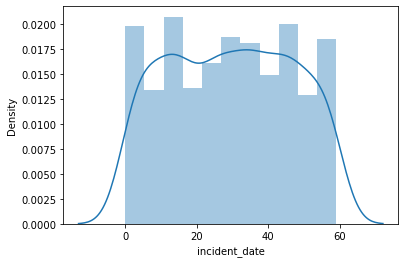

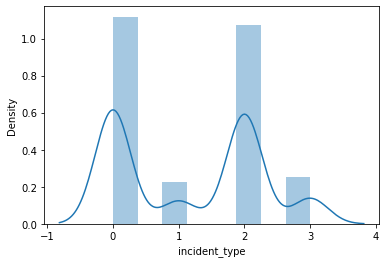

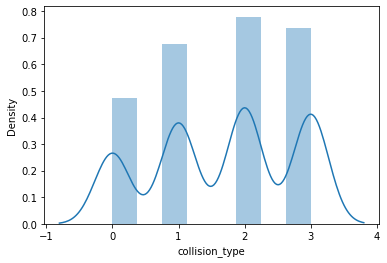

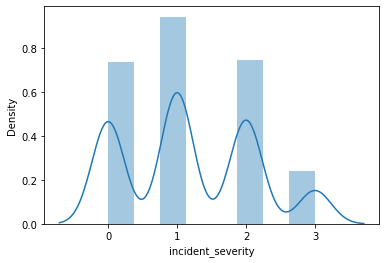

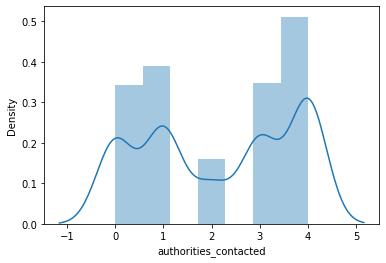

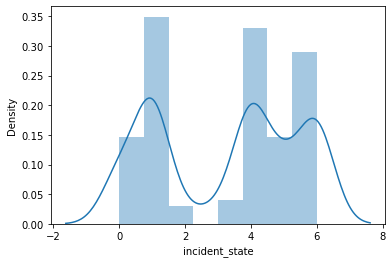

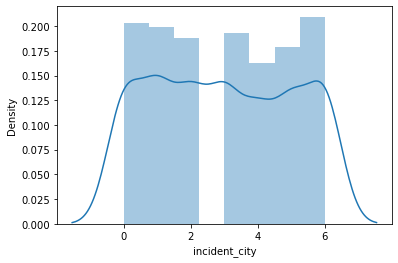

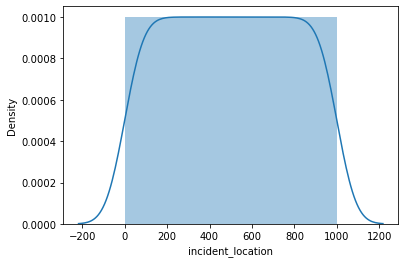

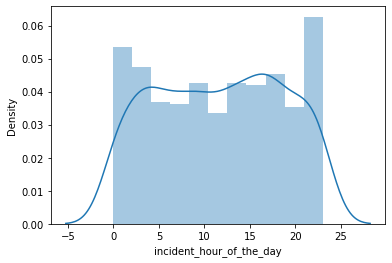

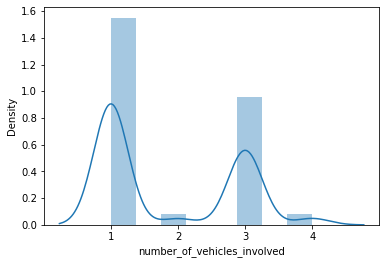

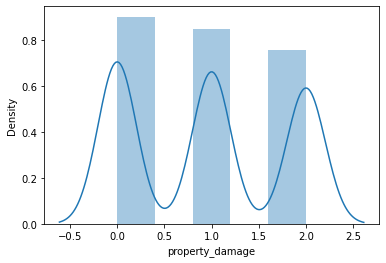

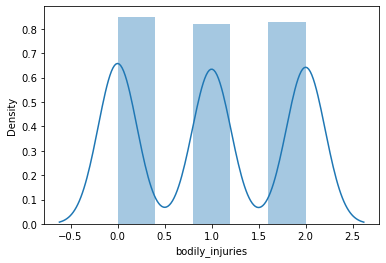

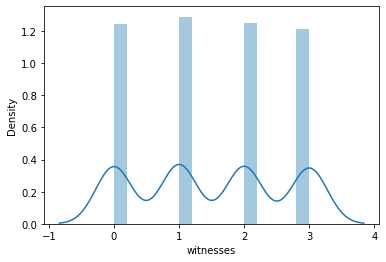

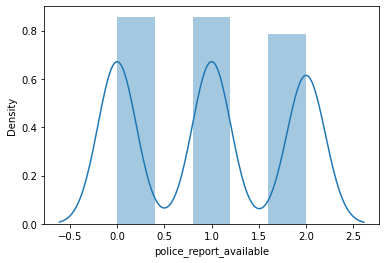

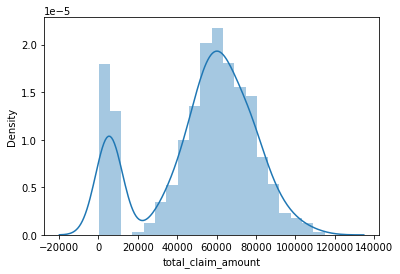

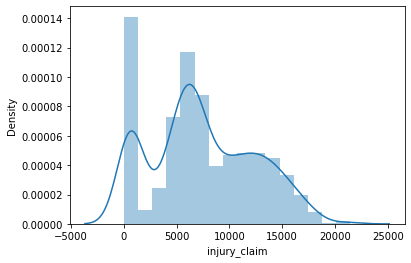

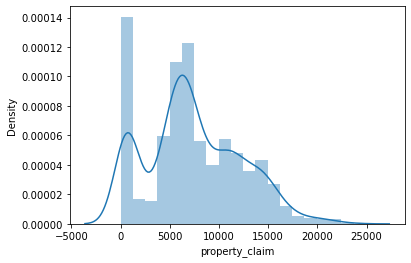

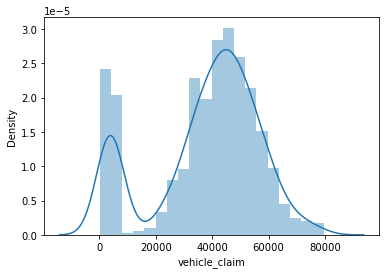

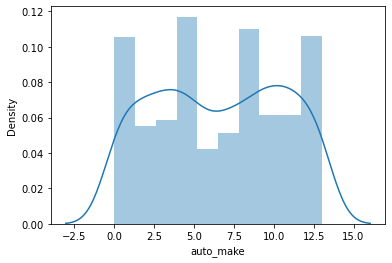

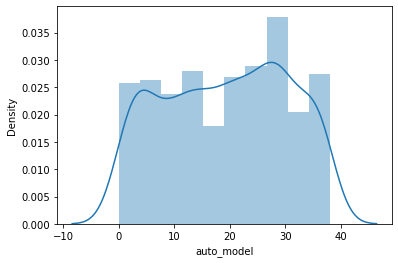

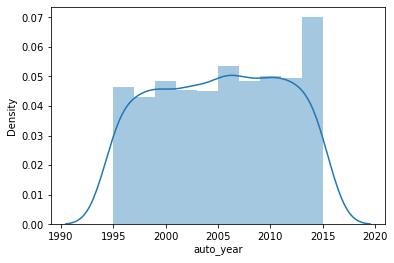

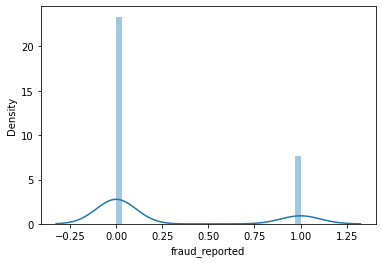

In [184]:
#Distplot for individual columns
for i in df.columns:
    plt.subplots()
    sns.distplot(df[i],label = i)

Observation:
    
Many columns have high skewness and we need to remove it.

Bivariate Analysis

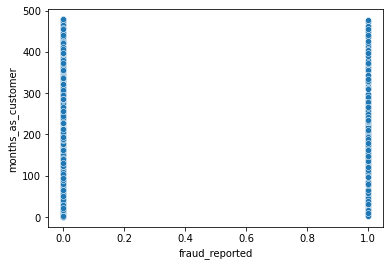

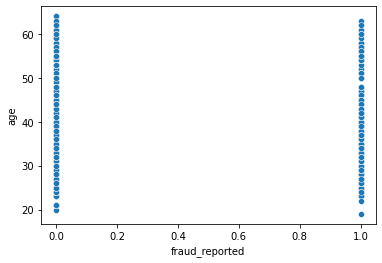

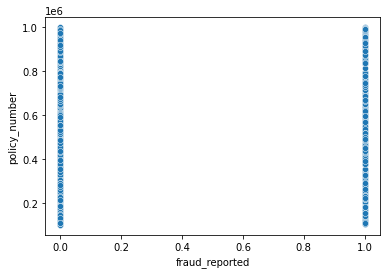

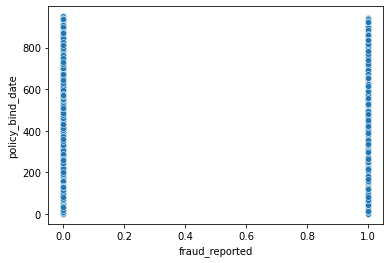

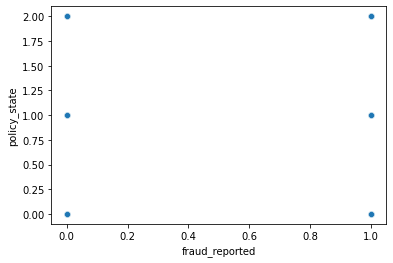

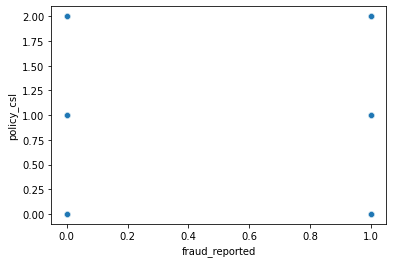

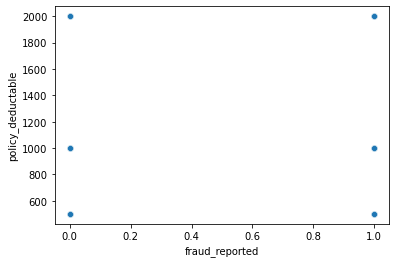

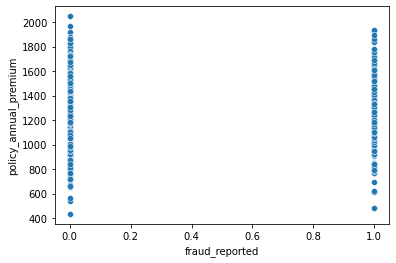

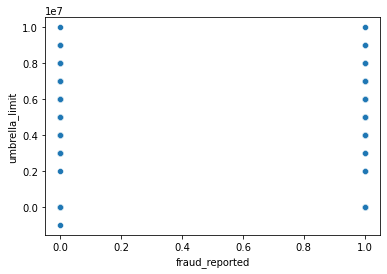

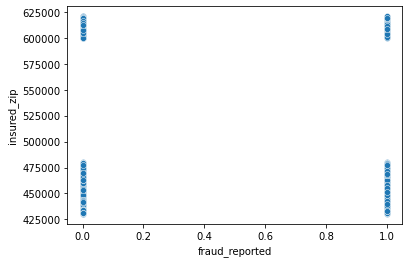

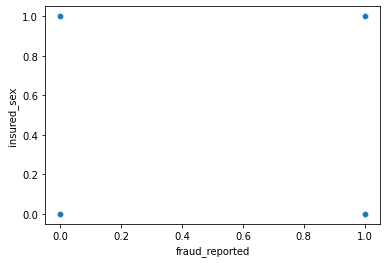

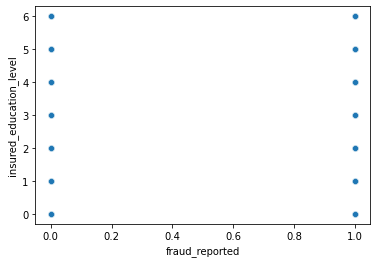

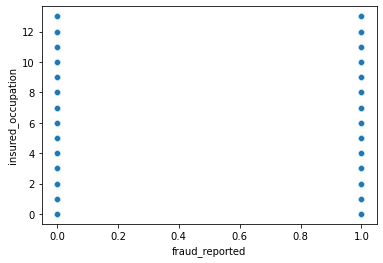

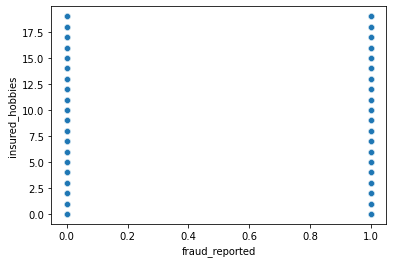

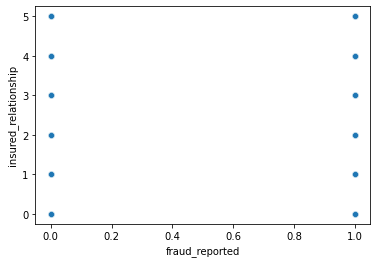

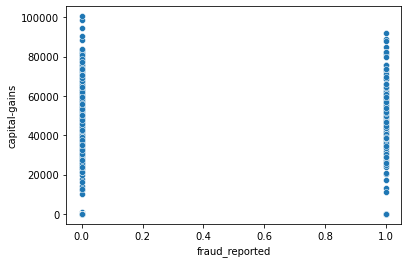

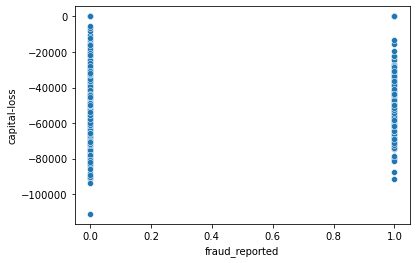

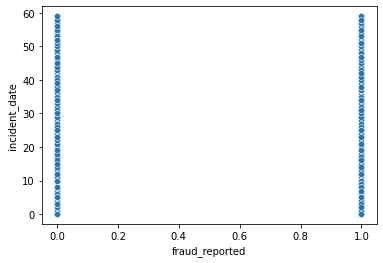

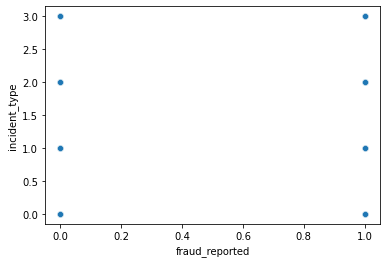

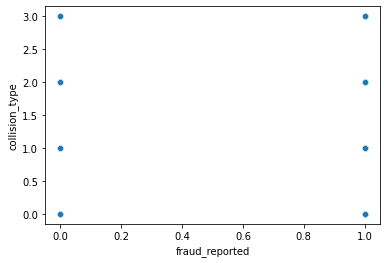

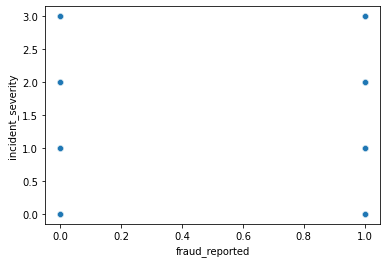

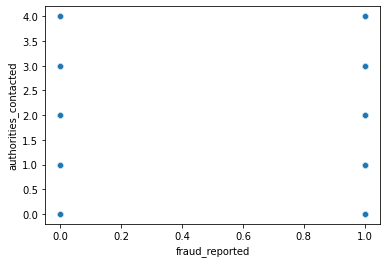

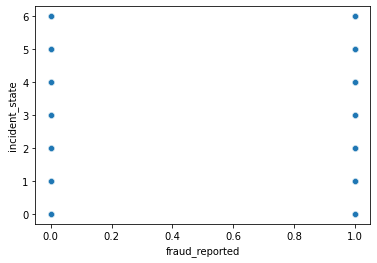

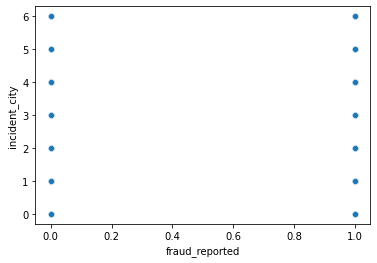

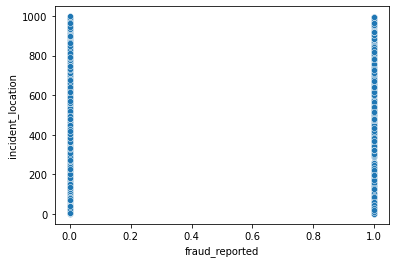

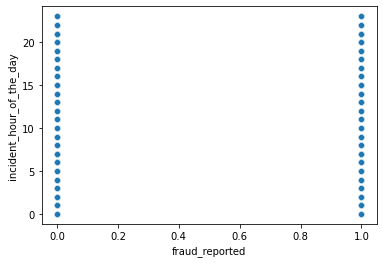

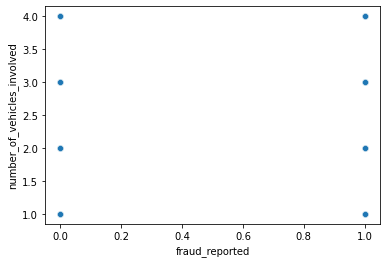

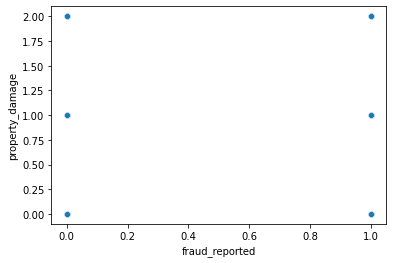

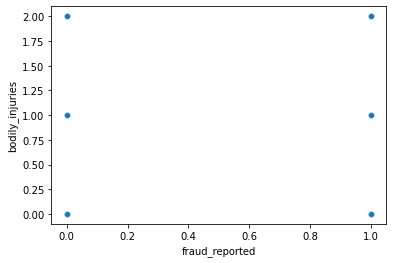

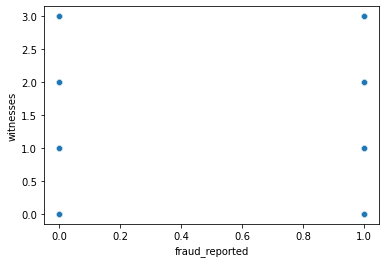

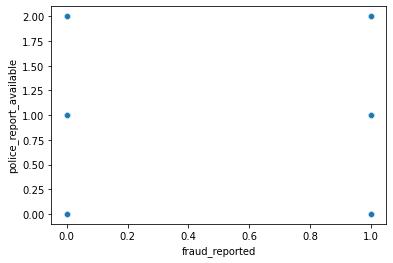

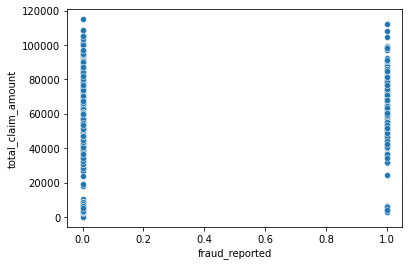

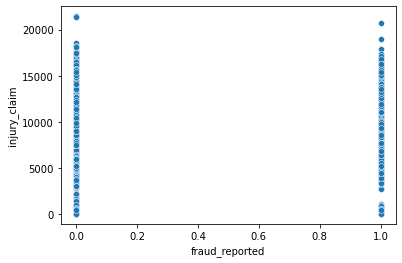

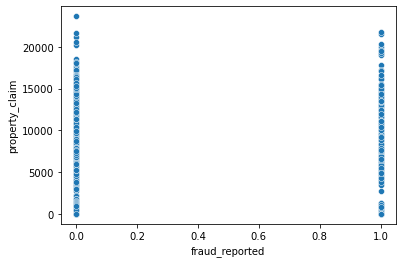

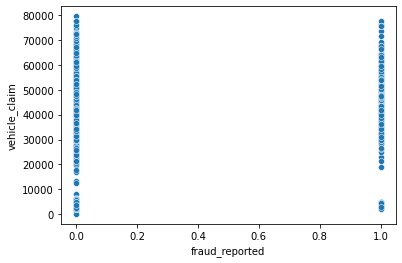

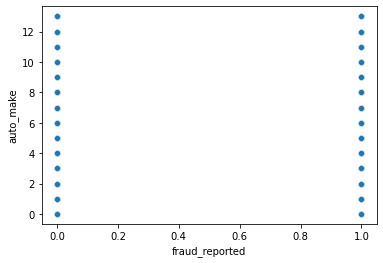

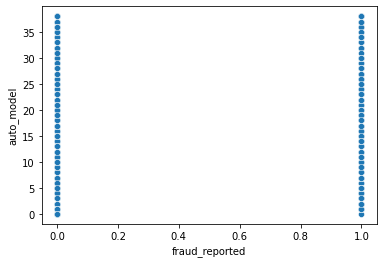

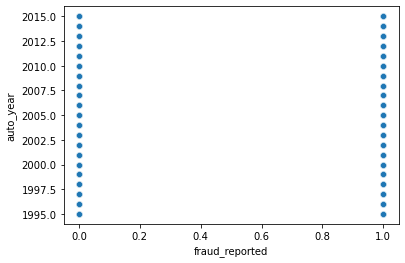

In [185]:
#Scatter Plots between output variable fraud_reported & Input variables
out_var=df['fraud_reported']
input_var=df.drop(['fraud_reported'],axis=1)
for i in input_var.columns:
    plt.subplots()
    sns.scatterplot(out_var,input_var[i])

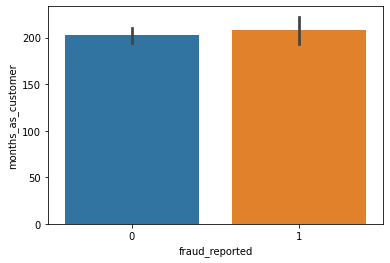

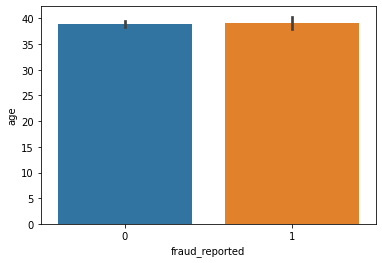

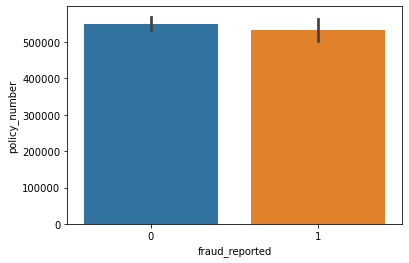

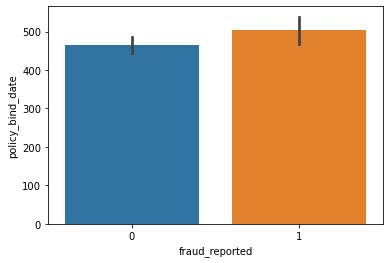

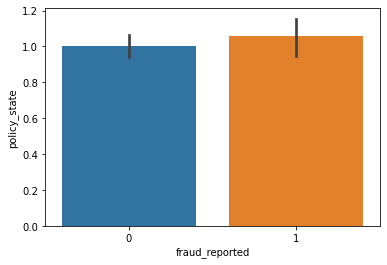

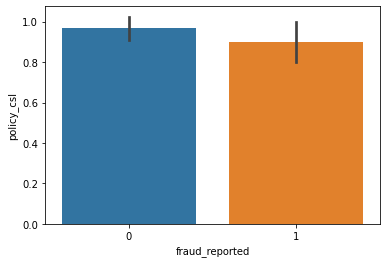

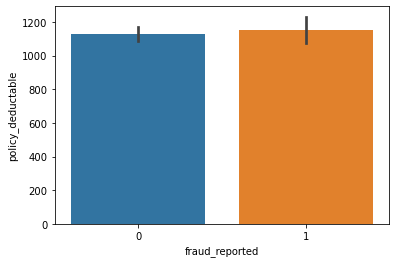

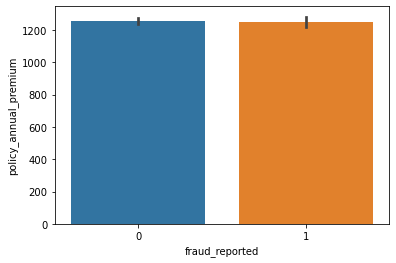

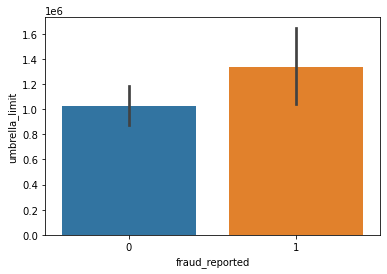

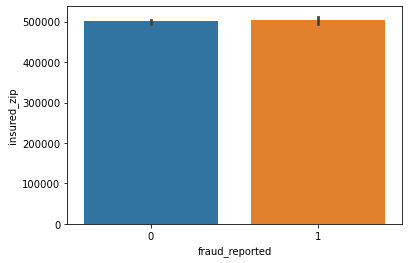

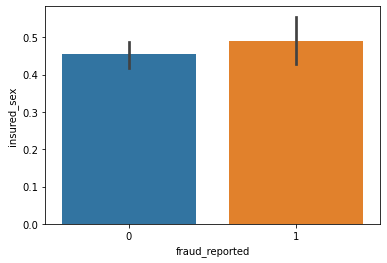

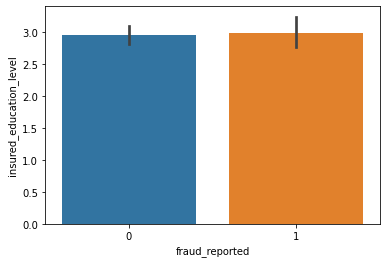

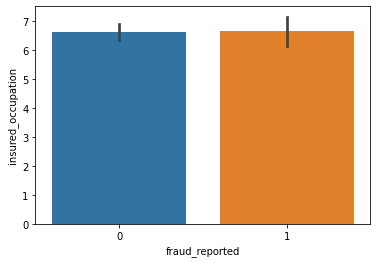

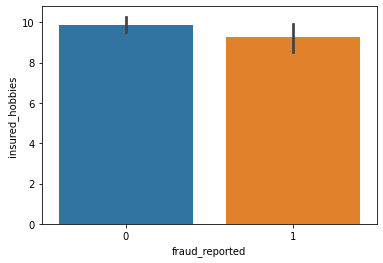

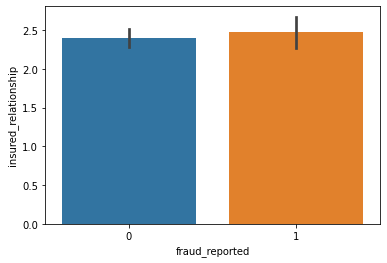

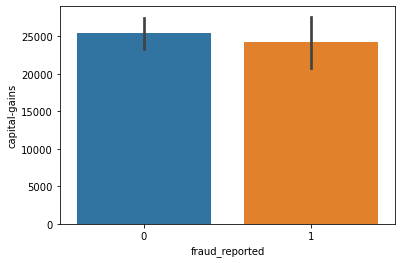

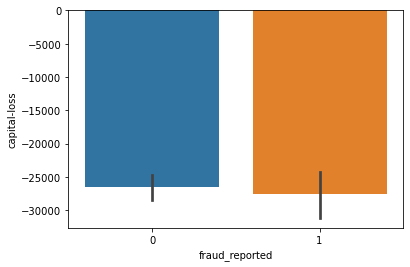

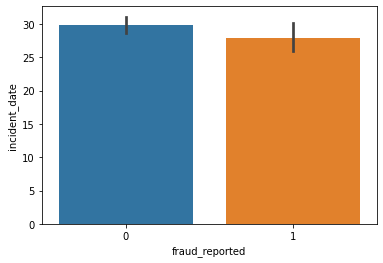

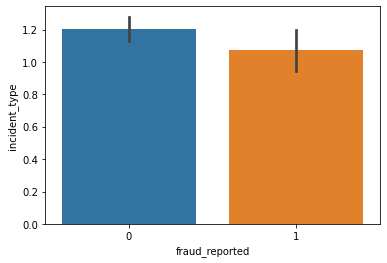

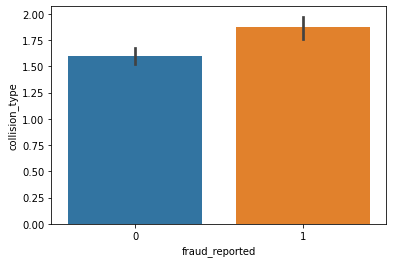

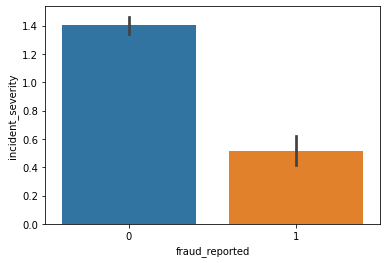

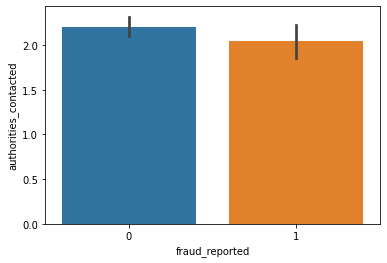

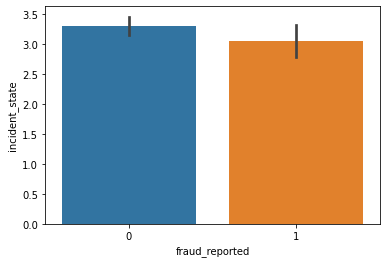

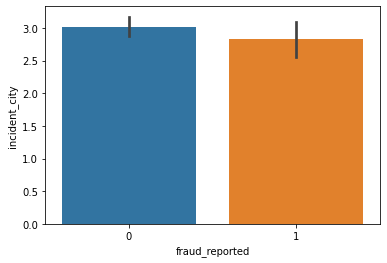

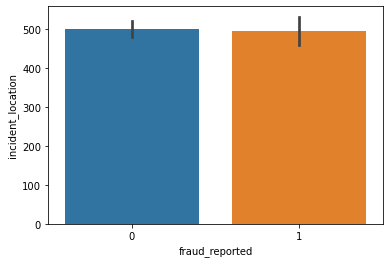

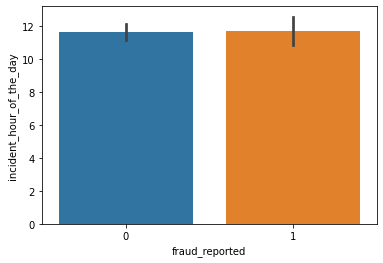

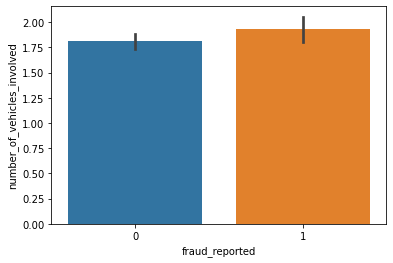

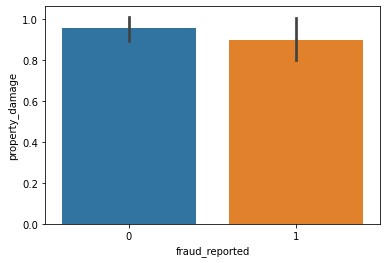

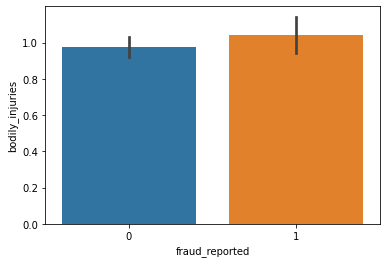

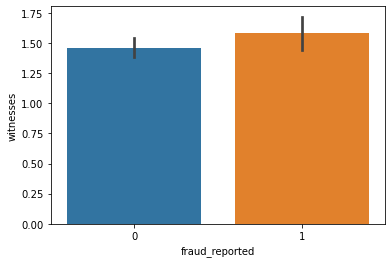

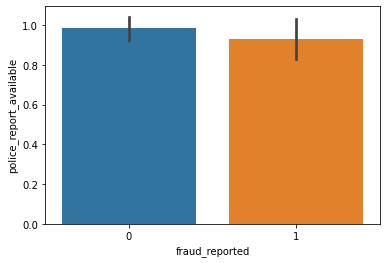

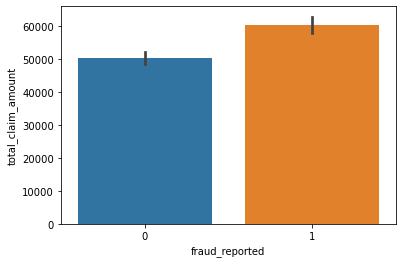

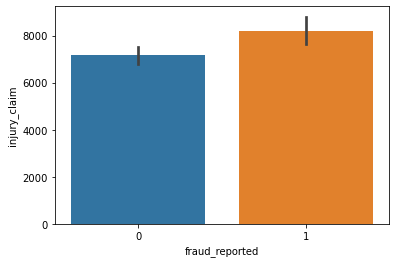

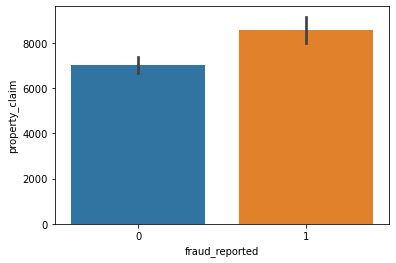

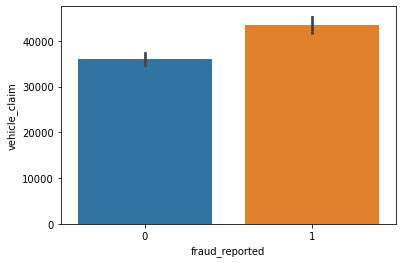

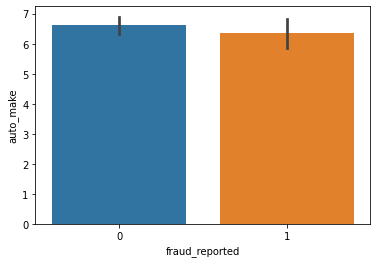

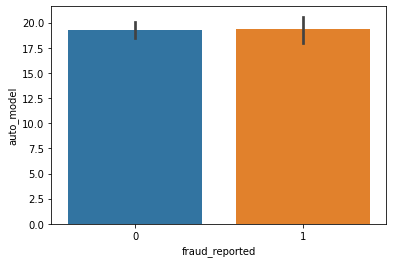

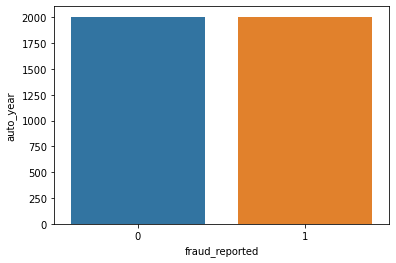

In [186]:
#Bar Plots between output & Input variables
for i in input_var.columns:
    plt.subplots()
    sns.barplot(out_var,input_var[i])

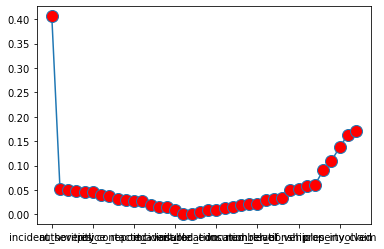

In [187]:
#checking highly correlated values with Output variable w
abs(df.corr().loc['fraud_reported'].drop('fraud_reported').sort_values()).plot(marker='o',markerfacecolor='red',markersize=12)
plt.show()

Multivariate Analysis

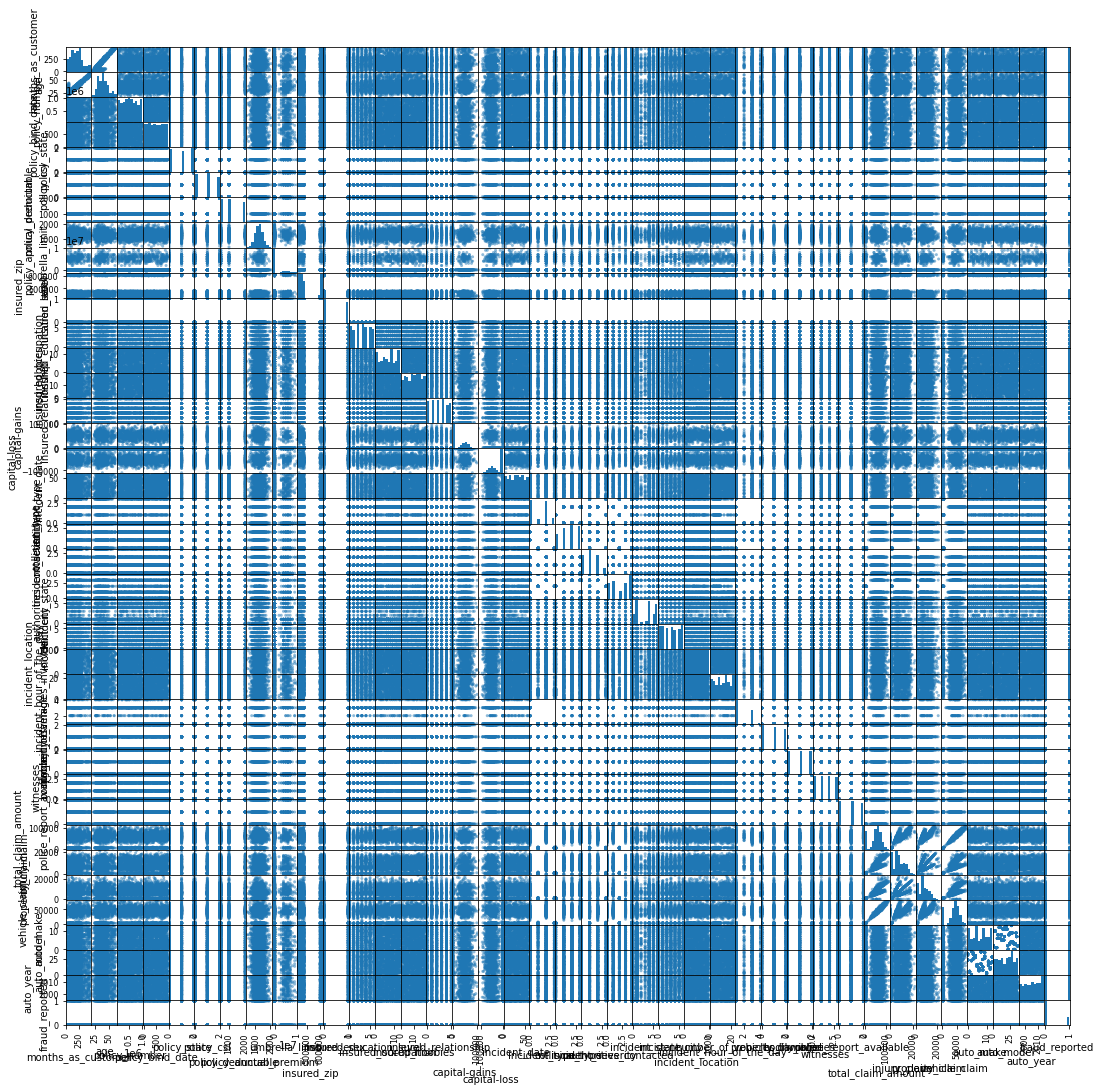

In [188]:
#Scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(18,18),grid=True)
plt.show()

Plotting Outliers

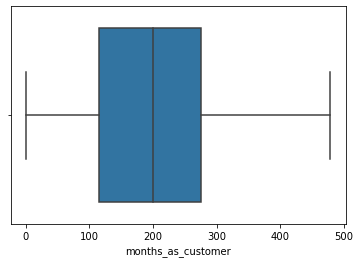

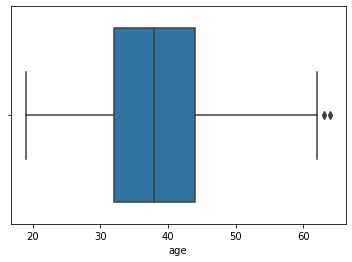

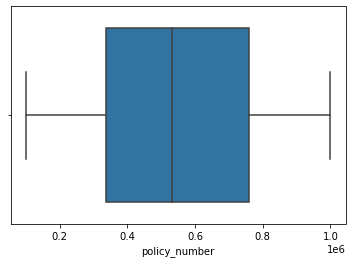

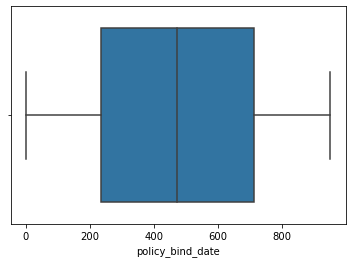

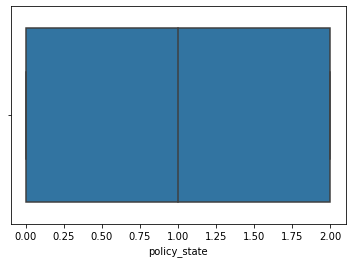

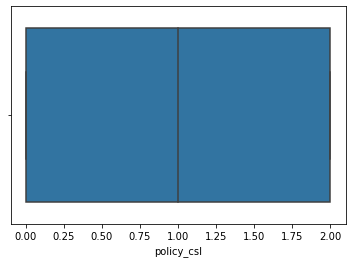

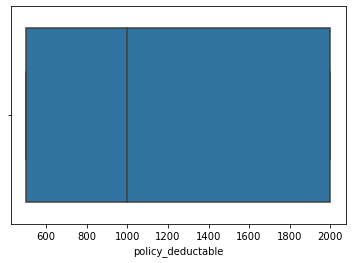

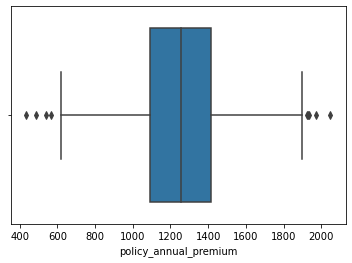

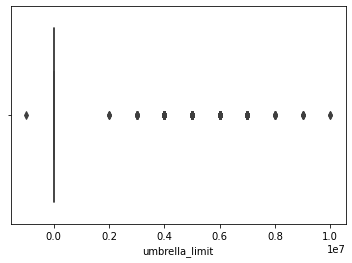

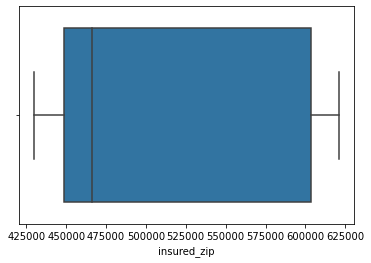

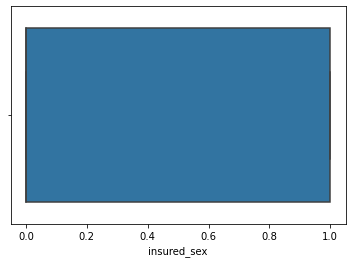

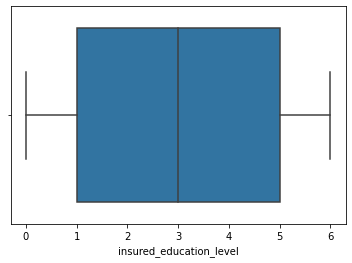

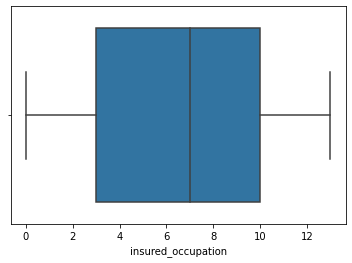

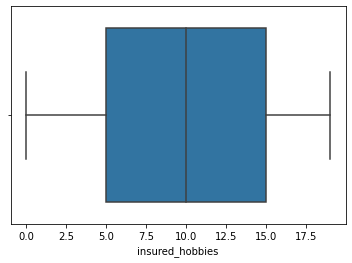

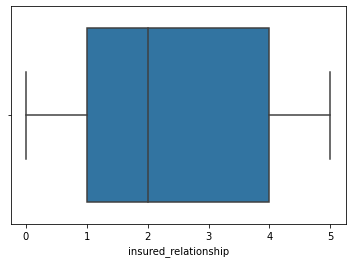

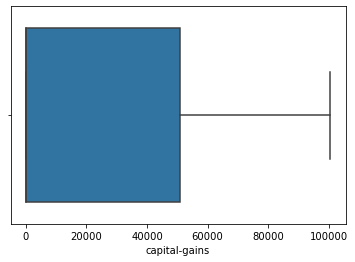

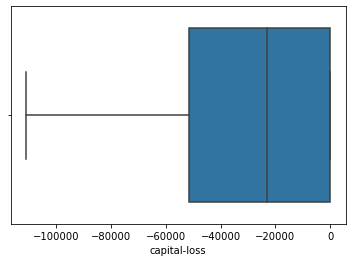

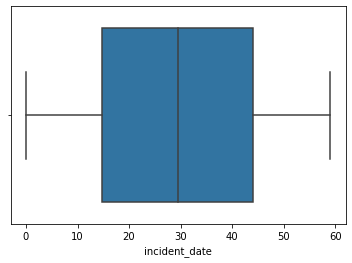

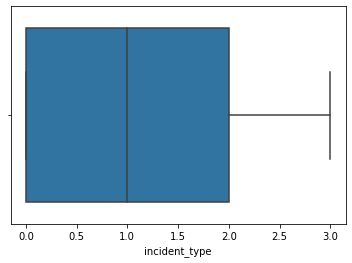

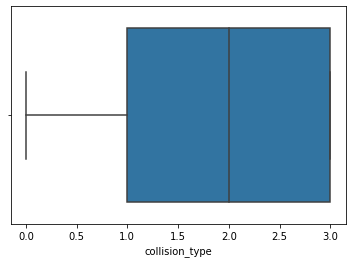

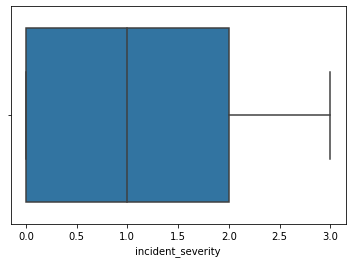

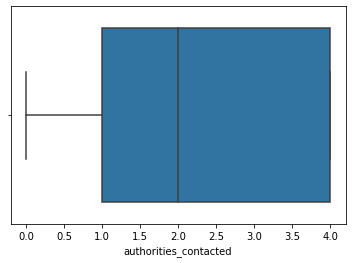

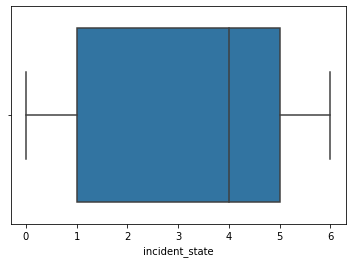

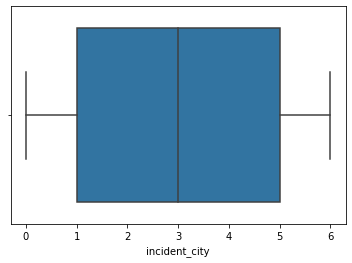

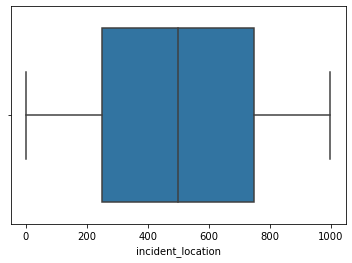

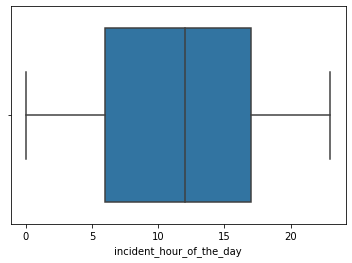

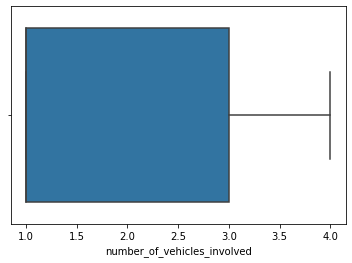

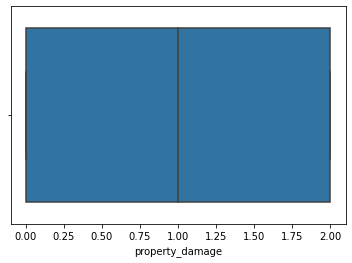

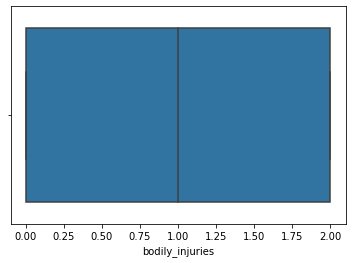

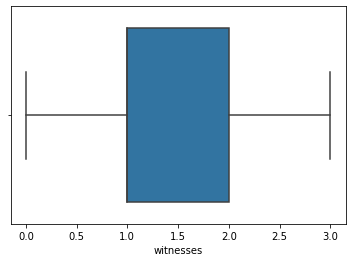

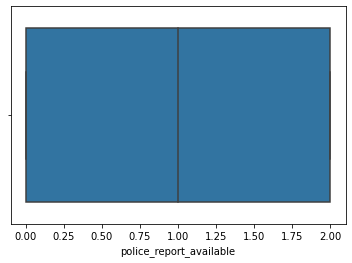

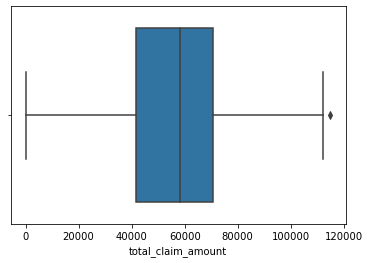

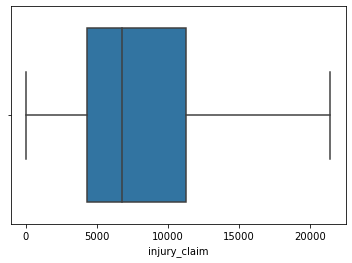

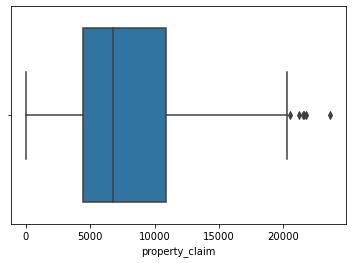

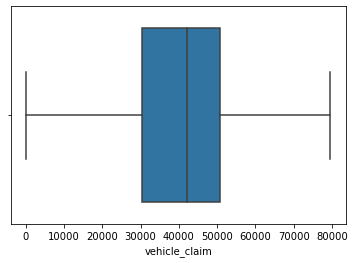

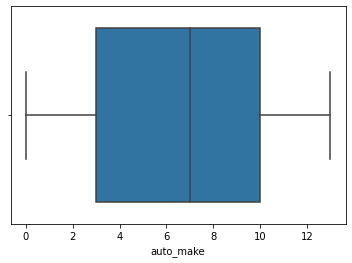

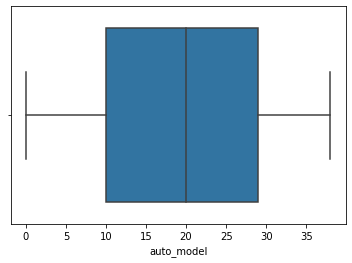

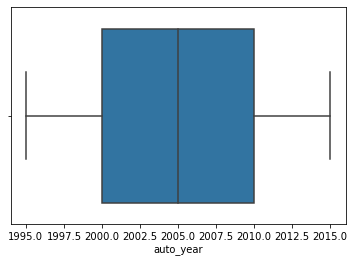

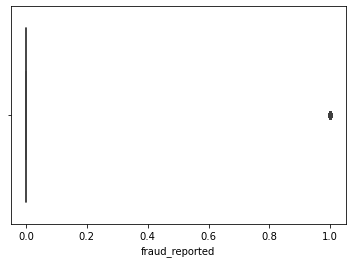

In [189]:
#checking boxplots column wise
for i in df.columns:
    plt.subplots()
    sns.boxplot(df[i])

Observation:
    
Outliers present in many rows.

# Removing outliers

In [190]:
#Lets remove the outliers if present using z scores
from scipy.stats import zscore
zs=np.abs(zscore(df))
print(zs.shape)

(1000, 39)


In [191]:
#checking which data have zscore is more than 3
print(np.where(zs>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
        8,  8,  8], dtype=int64))


In [192]:
#Dropping Outliers
df1=df.loc[(abs(zs)<3).all(axis=1)]
print(df1.shape)

(980, 39)


Observation:
    
So, as per above shapes: 1000-980=20 so 20 outliers are removed and data loss is nearly 2%.

# Skewness

In [193]:
#Skewness in dataset after removing outliers
df1.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_bind_date               0.006386
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369


In [194]:
#Lets divide dataset into input and output
x=df1.drop('fraud_reported',axis=1)
x.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,2,3,1,34650,7700,3850,23100,4,30,2007
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,2,1,63400,6340,6340,50720,3,34,2014
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,0,1,1,6500,1300,650,4550,0,31,2009


In [195]:
print(x.shape)

(980, 38)


In [196]:
y=df1["fraud_reported"]
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [197]:
print(y.shape)

(980,)


In [198]:
#Lets chcek the skewness of the input dataset
x.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_bind_date               0.006386
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369


In [199]:
#Let's check Number of features having skewness more than 0.55
print(len(x.skew().loc[x.skew()>0.55]))

2


In [200]:
#Lets treat above skewness using cube root transformation
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [201]:
#lets again check the skewness
x.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_bind_date               0.006386
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.603923
insured_zip                    0.814942
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369


In [202]:
#Let's again check Number of features having skewness more than 0.55
print(len(x.skew().loc[x.skew()>0.55]))

2


In [203]:
#Lets treat above skewness using np.log1p transformation
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.log1p(x[index])

In [204]:
#lets again check the skewness
x.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_bind_date               0.006386
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.584253
insured_zip                    0.802712
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369


In [205]:
#Removing Column "incident_location" as it have 1000 unique locations
x.drop('incident_location',axis=1,inplace=True)

In [206]:
#Removing Column "policy_number" as it have 1000 unique policy ids
x.drop('policy_number',axis=1,inplace=True)

In [207]:
#Removing Column "insured_zip" as it have 995 unique values
x.drop('insured_zip',axis=1,inplace=True)

In [208]:
x['umbrella_limit'].unique()

array([0.        , 5.14748049, 5.20791147, 5.07354815, 4.97828397,
       5.25902087,        nan, 4.84412492])

In [209]:
#Removing nan value
x = x.drop(x[x['umbrella_limit'] == 'nan'].index)

In [210]:
#changing datatype of umbrella_limit
x['umbrella_limit'] = x['umbrella_limit'].values.astype(np.int64)

In [211]:
x.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries          

In [212]:
#Lets do the preprocessing bring features to common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x1=sc.transform(x)
x1=pd.DataFrame(x,columns=x.columns)

In [213]:
x1.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries          

In [214]:
x1.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,532,2,1,1000,1406.91,0,1,4,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,821,1,1,2000,1197.22,5,1,4,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,186,2,0,2000,1413.14,5,0,6,...,2,3,1,34650,7700,3850,23100,4,30,2007
3,256,41,766,0,1,2000,1415.74,5,0,6,...,1,2,1,63400,6340,6340,50720,3,34,2014
4,228,44,181,0,2,1000,1583.91,5,1,0,...,0,1,1,6500,1300,650,4550,0,31,2009


# Evaluate Some Algorithms (Classification)

In [215]:
#splitting data in to Training & Test Sets and check at random_state=42
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
x_train,x_test,y_train,y_test = train_test_split(x1,y,random_state=42,test_size=0.20,stratify=y)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (784, 35)
Training target vector size: (784,)
Test feature matrix size: (196, 35)
Test target vector size: (196,)


In [216]:
#since it is imbalanced dataset so we will focus on auc-roc score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,x1,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x1, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [217]:
# Importing machine learning Libraries from sklearn & XGBoost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [219]:
#Model list
rfc=RandomForestClassifier()
dt=DecisionTreeClassifier()
logr=LogisticRegression()
grb=GradientBoostingClassifier()
kc=KNeighborsClassifier()
adb=AdaBoostClassifier()
model=['RandomForest Classifier','DecisionTree Classifier','LogisticRegression Classifier','GradientBoosting Classifier','KNeighborsClassifier','AdaBoost Classifier']

In [220]:
# creating empty lists to store performance score
Lscore=[]
Ascore=[]
Cvscore=[]
fscore=[]
RAC=[]
Logloss=[]

Maximum Accuracy Score corresponding to Random State  54 is --> 0.8010204081632653 

Results after applying RandomForest Classification
Learning Score is 1.0
F1 score is 0.2686567164179105
Accuracy is 75.0 %
Accuracy Score is:  0.75
Cross Validation Score is :  0.7653061224489796
log_loss is :  8.634734894514924
roc auc score is :  0.5599662162162162
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85       148
           1       0.47      0.19      0.27        48

    accuracy                           0.75       196
   macro avg       0.63      0.56      0.56       196
weighted avg       0.70      0.75      0.71       196

Confusion Matrix:
 [[138  10]
 [ 39   9]]


Text(0.5, 0, 'False_positive_rate')

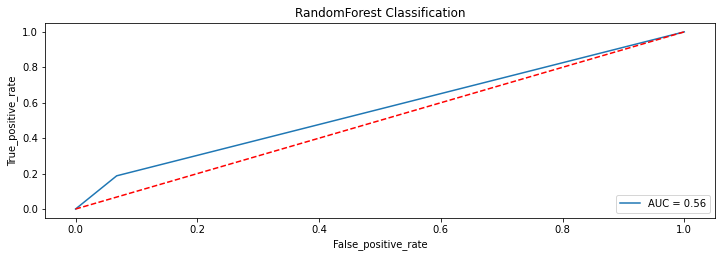

In [221]:
#Applying RandomForest Classification
r_state=mac_score(rfc,x1,y)
rfc=RandomForestClassifier(n_estimators=100,random_state=r_state)
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,stratify=y)
rfc.fit(x_train,y_train)
ypred=rfc.predict(x_test)
print("Results after applying RandomForest Classification")
#Learning Score, F1 Score, Accuracy
print("Learning Score is",rfc.score(x_train,y_train))
Lscore.append(rfc.score(x_train,y_train))
print("F1 score is",metrics.f1_score(y_test,ypred))
fscore.append(metrics.f1_score(y_test,ypred))
print("Accuracy is",(round(rfc.score(x_test,y_test)*100,2)),"%")
#accuracy score
acc_score=accuracy_score(y_test,ypred)
print('Accuracy Score is: ',acc_score)
Ascore.append(acc_score)
#cross validation score
cvscore=cross_val_score(rfc,x1,y,cv=10,scoring='accuracy').mean()
print('Cross Validation Score is : ',cvscore)
Cvscore.append(cvscore)
#Log_Loss
logloss = log_loss(y_true = y_test, y_pred = ypred)
print('log_loss is : ', logloss)
Logloss.append(logloss)
#Roc auc score 
false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,ypred)
roc_auc=auc(false_positive_rate, true_positive_rate)
print('roc auc score is : ', roc_auc)
RAC.append(roc_auc)
print('Classification Report:\n',classification_report(y_test,ypred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred))
plt.figure(figsize=(12,38))
plt.subplot(911)
plt.title('RandomForest Classification')
plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate') 

Maximum Accuracy Score corresponding to Random State  58 is --> 0.8316326530612245 

Results after applying Decision Tree Classification
Learning Score is 1.0
F1 score is 0.47191011235955055
Accuracy is 76.02 %
Accuracy Score is:  0.7602040816326531
Cross Validation Score is :  0.7826530612244897
log_loss is :  8.28233919647656
roc auc score is :  0.6511824324324326
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       148
           1       0.51      0.44      0.47        48

    accuracy                           0.76       196
   macro avg       0.67      0.65      0.66       196
weighted avg       0.75      0.76      0.75       196

Confusion Matrix:
 [[128  20]
 [ 27  21]]


Text(0.5, 0, 'False_positive_rate')

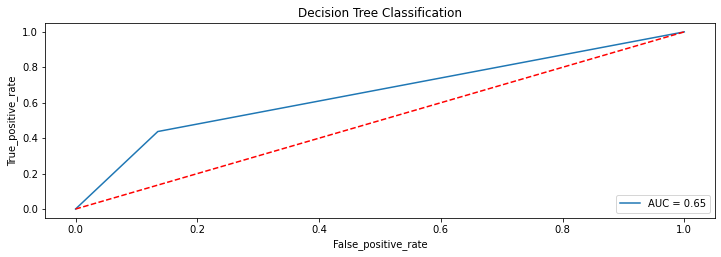

In [222]:
#Applying Decision Tree Classification
r_state=mac_score(dt,x1,y)
dt=DecisionTreeClassifier(random_state=r_state)
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,stratify=y)
dt.fit(x_train,y_train)
ypred=dt.predict(x_test)
print("Results after applying Decision Tree Classification")
#Learning Score, F1 Score, Accuracy
print("Learning Score is",dt.score(x_train,y_train))
Lscore.append(dt.score(x_train,y_train))
print("F1 score is",metrics.f1_score(y_test,ypred))
fscore.append(metrics.f1_score(y_test,ypred))
print("Accuracy is",(round(dt.score(x_test,y_test)*100,2)),"%")
#accuracy score
acc_score=accuracy_score(y_test,ypred)
print('Accuracy Score is: ',acc_score)
Ascore.append(acc_score)
#cross validation score
cvscore=cross_val_score(dt,x1,y,cv=10,scoring='accuracy').mean()
print('Cross Validation Score is : ',cvscore)
Cvscore.append(cvscore)
#Log_Loss
logloss = log_loss(y_true = y_test, y_pred =ypred)
print('log_loss is : ',logloss)
Logloss.append(logloss)
#Roc auc score 
false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,ypred)
roc_auc=auc(false_positive_rate, true_positive_rate)
print('roc auc score is : ', roc_auc)
RAC.append(roc_auc)
print('Classification Report:\n',classification_report(y_test,ypred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred))
plt.figure(figsize=(12,38))
plt.subplot(911)
plt.title('Decision Tree Classification')
plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate') 

Maximum Accuracy Score corresponding to Random State  68 is --> 0.7602040816326531 

Results after applying LogisticRegression Classifier
Learning Score is 0.7512755102040817
F1 score is 0.0
Accuracy is 74.49 %
Accuracy Score is:  0.7448979591836735
Cross Validation Score is :  0.7551020408163265
log_loss is :  8.81092050479793
roc auc score is :  0.49324324324324326
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85       148
           1       0.00      0.00      0.00        48

    accuracy                           0.74       196
   macro avg       0.38      0.49      0.43       196
weighted avg       0.57      0.74      0.64       196

Confusion Matrix:
 [[146   2]
 [ 48   0]]


Text(0.5, 0, 'False_positive_rate')

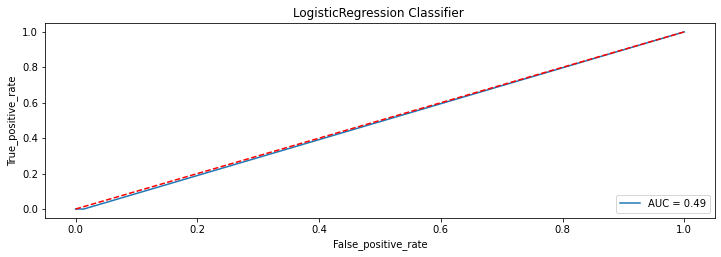

In [223]:
#Applying LogisticRegression Classifier 
r_state=mac_score(logr,x1,y)
logr=LogisticRegression(random_state=r_state)
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,stratify=y)
logr.fit(x_train,y_train)
ypred=logr.predict(x_test)
print("Results after applying LogisticRegression Classifier")
#Learning Score, F1 Score, Accuracy
print("Learning Score is",logr.score(x_train,y_train))
Lscore.append(logr.score(x_train,y_train))
print("F1 score is",metrics.f1_score(y_test,ypred))
fscore.append(metrics.f1_score(y_test,ypred))
print("Accuracy is",(round(logr.score(x_test,y_test)*100,2)),"%")
#accuracy score
acc_score=accuracy_score(y_test,ypred)
print('Accuracy Score is: ',acc_score)
Ascore.append(acc_score)
#cross validation score
cvscore=cross_val_score(logr,x1,y,cv=10,scoring='accuracy').mean()
print('Cross Validation Score is : ',cvscore)
Cvscore.append(cvscore)
#Log_Loss
logloss = log_loss(y_true = y_test, y_pred =ypred)
print('log_loss is : ',logloss)
Logloss.append(logloss)
#Roc auc score 
false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,ypred)
roc_auc=auc(false_positive_rate, true_positive_rate)
print('roc auc score is : ', roc_auc)
RAC.append(roc_auc)
print('Classification Report:\n',classification_report(y_test,ypred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred))
plt.figure(figsize=(12,38))
plt.subplot(911)
plt.title('LogisticRegression Classifier ')
plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate')

Maximum Accuracy Score corresponding to Random State  74 is --> 0.8622448979591837 

Results after applying GradientBoostingClassifier
Learning Score is 0.9821428571428571
F1 score is 0.5555555555555556
Accuracy is 79.59 %
Accuracy Score is:  0.7959183673469388
Cross Validation Score is :  0.810204081632653
log_loss is :  7.048799229350718
roc auc score is :  0.7029842342342343
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       148
           1       0.60      0.52      0.56        48

    accuracy                           0.80       196
   macro avg       0.72      0.70      0.71       196
weighted avg       0.79      0.80      0.79       196

Confusion Matrix:
 [[131  17]
 [ 23  25]]


Text(0.5, 0, 'False_positive_rate')

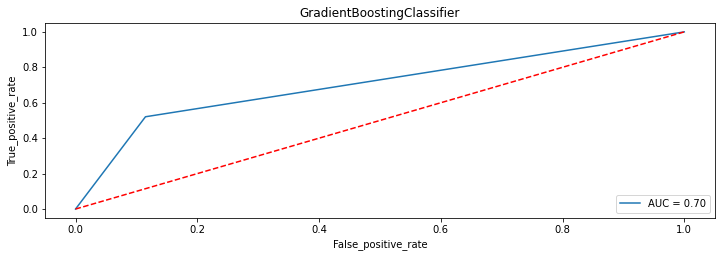

In [224]:
#Applying GradientBoostingClassifier
r_state=mac_score(grb,x1,y)
grb=GradientBoostingClassifier(n_estimators=100,random_state=r_state)
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,stratify=y)
grb.fit(x_train,y_train)
ypred=grb.predict(x_test)
print("Results after applying GradientBoostingClassifier")
#Learning Score, F1 Score, Accuracy
print("Learning Score is",grb.score(x_train,y_train))
Lscore.append(grb.score(x_train,y_train))
print("F1 score is",metrics.f1_score(y_test,ypred))
fscore.append(metrics.f1_score(y_test,ypred))
print("Accuracy is",(round(grb.score(x_test,y_test)*100,2)),"%")
#accuracy score
acc_score=accuracy_score(y_test,ypred)
print('Accuracy Score is: ',acc_score)
Ascore.append(acc_score)
#cross validation score
cvscore=cross_val_score(grb,x1,y,cv=10,scoring='accuracy').mean()
print('Cross Validation Score is : ',cvscore)
Cvscore.append(cvscore)
#Log_Loss
logloss = log_loss(y_true = y_test, y_pred =ypred)
print('log_loss is : ',logloss)
Logloss.append(logloss)
#Roc auc score 
false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,ypred)
roc_auc=auc(false_positive_rate, true_positive_rate)
print('roc auc score is : ', roc_auc)
RAC.append(roc_auc)
print('Classification Report:\n',classification_report(y_test,ypred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred))
plt.figure(figsize=(12,38))
plt.subplot(911)
plt.title('GradientBoostingClassifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate') 

# GridSearch CV

In [225]:
# using gridsearch CV to find the best parameters to use in k-nearest neighbors Classification. 
#kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="roc_auc")
clf.fit(x1,y)
clf.best_params_

{'n_neighbors': 29}

# k-nearest neighbors Classification

Maximum Accuracy Score corresponding to Random State  53 is --> 0.7346938775510204 

Results after applying k-nearest neighbors Classification
Learning Score is 0.7551020408163265
F1 score is 0.0
Accuracy is 75.51 %
Accuracy Score is:  0.7551020408163265
Cross Validation Score is :  0.7540816326530612
log_loss is :  8.458475851814862
roc auc score is :  0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       148
           1       0.00      0.00      0.00        48

    accuracy                           0.76       196
   macro avg       0.38      0.50      0.43       196
weighted avg       0.57      0.76      0.65       196

Confusion Matrix:
 [[148   0]
 [ 48   0]]


Text(0.5, 0, 'False_positive_rate')

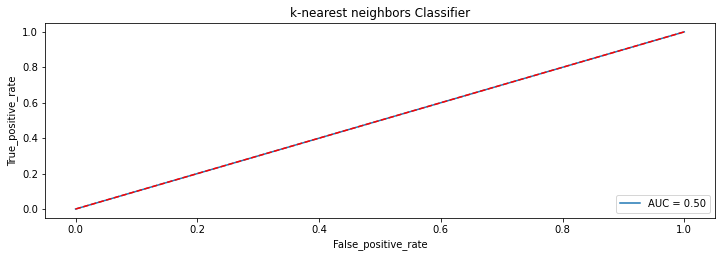

In [226]:
#Applying  k-nearest neighbors Classification 
r_state=mac_score(kc,x1,y)
kc=KNeighborsClassifier(n_neighbors=29)
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,stratify=y)
kc.fit(x_train,y_train)
ypred=kc.predict(x_test)
print("Results after applying k-nearest neighbors Classification")
#Learning Score, F1 Score, Accuracy
print("Learning Score is",kc.score(x_train,y_train))
Lscore.append(kc.score(x_train,y_train))
print("F1 score is",metrics.f1_score(y_test,ypred))
fscore.append(metrics.f1_score(y_test,ypred))
print("Accuracy is",(round(kc.score(x_test,y_test)*100,2)),"%")
#accuracy score
acc_score=accuracy_score(y_test,ypred)
print('Accuracy Score is: ',acc_score)
Ascore.append(acc_score)
#cross validation score
cvscore=cross_val_score(kc,x1,y,cv=10,scoring='accuracy').mean()
print('Cross Validation Score is : ',cvscore)
Cvscore.append(cvscore)
#Log_Loss
logloss = log_loss(y_true = y_test, y_pred =ypred)
print('log_loss is : ',logloss)
Logloss.append(logloss)
#Roc auc score 
false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,ypred)
roc_auc=auc(false_positive_rate, true_positive_rate)
print('roc auc score is : ', roc_auc)
RAC.append(roc_auc)
print('Classification Report:\n',classification_report(y_test,ypred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred))
plt.figure(figsize=(12,38))
plt.subplot(911)
plt.title('k-nearest neighbors Classifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate') 

Maximum Accuracy Score corresponding to Random State  78 is --> 0.8469387755102041 

Results after applying AdaBoostClassifier
Learning Score is 0.9030612244897959
F1 score is 0.4634146341463415
Accuracy is 77.55 %
Accuracy Score is:  0.7755102040816326
Cross Validation Score is :  0.7999999999999999
log_loss is :  7.753664057844506
roc auc score is :  0.647240990990991
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       148
           1       0.56      0.40      0.46        48

    accuracy                           0.78       196
   macro avg       0.69      0.65      0.66       196
weighted avg       0.76      0.78      0.76       196

Confusion Matrix:
 [[133  15]
 [ 29  19]]


Text(0.5, 0, 'False_positive_rate')

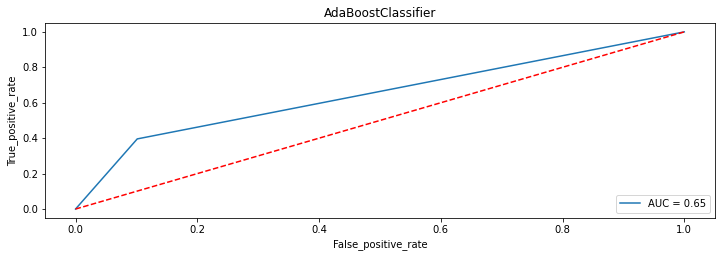

In [227]:
#Applying AdaBoostClassifier
r_state=mac_score(adb,x1,y)
adb=AdaBoostClassifier(n_estimators=100,random_state=r_state)
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,stratify=y)
adb.fit(x_train,y_train)
ypred=adb.predict(x_test)
print("Results after applying AdaBoostClassifier")
#Learning Score, F1 Score, Accuracy
print("Learning Score is",adb.score(x_train,y_train))
Lscore.append(adb.score(x_train,y_train))
print("F1 score is",metrics.f1_score(y_test,ypred))
fscore.append(metrics.f1_score(y_test,ypred))
print("Accuracy is",(round(adb.score(x_test,y_test)*100,2)),"%")
#accuracy score
acc_score=accuracy_score(y_test,ypred)
print('Accuracy Score is: ',acc_score)
Ascore.append(acc_score)
#cross validation score
cvscore=cross_val_score(adb,x1,y,cv=10,scoring='accuracy').mean()
print('Cross Validation Score is : ',cvscore)
Cvscore.append(cvscore)
#Log_Loss
logloss = log_loss(y_true = y_test, y_pred =ypred)
print('log_loss is : ',logloss)
Logloss.append(logloss)
#Roc auc score 
false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,ypred)
roc_auc=auc(false_positive_rate, true_positive_rate)
print('roc auc score is : ', roc_auc)
RAC.append(roc_auc)
print('Classification Report:\n',classification_report(y_test,ypred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ypred))
plt.figure(figsize=(12,38))
plt.subplot(911)
plt.title('AdaBoostClassifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate')

In [228]:
#Combining all scores in one place to decide best one model
top=pd.DataFrame({})
top['Model']=model
top['Learning Score']=Lscore
top['Accuracy Score']=Ascore
top['Cross Validation Score']=Cvscore
top['F1 Score']=fscore
top['Roc_Auc_curve']=RAC
top['Log Loss']=Logloss
top

,Model,Learning Score,Accuracy Score,Cross Validation Score,F1 Score,Roc_Auc_curve,Log Loss
0,RandomForest Classifier,1.000000,0.750000,0.765306,0.268657,0.559966,8.634735
1,DecisionTree Classifier,1.000000,0.760204,0.782653,0.471910,0.651182,8.282339
2,LogisticRegression Classifier,0.751276,0.744898,0.755102,0.000000,0.493243,8.810921
3,GradientBoosting Classifier,0.982143,0.795918,0.810204,0.555556,0.702984,7.048799
4,KNeighborsClassifier,0.755102,0.755102,0.754082,0.000000,0.500000,8.458476
5,AdaBoost Classifier,0.903061,0.775510,0.800000,0.463415,0.647241,7.753664


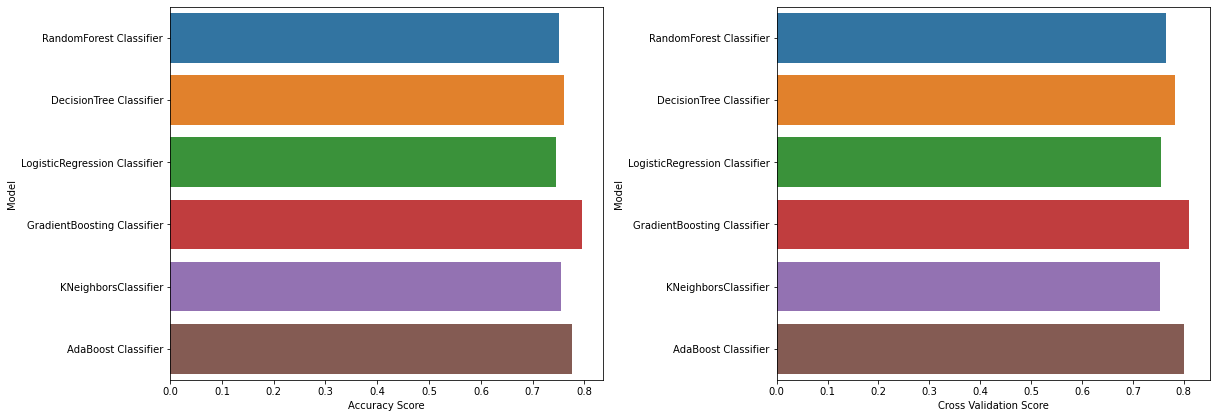

In [229]:
#Plotting bar plot of acc scores and cv scores of various models
plt.figure(figsize=(17,17))

plt.subplot(3,2,1)
sns.barplot(x = 'Accuracy Score', y = 'Model', data = top)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross Validation Score', y = 'Model', data = top)
plt.tight_layout()
plt.show()

Observations:-

1- After comparing above 6 models on basis of Learning Score,Accuracy Score,Cross Validation Score,F1 Score, Roc_Auc_curve & Log Loss parameters GradientBoosting Classifier gives best result.

2- We will use GridsearchCV to find best parameters.

# GridSearch CV

In [233]:
#usimg gridsearch CV to find best parameters for Gradient Boosting classifier
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,cv=5)
tuning.fit(x_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1, 'n_estimators': 1500}, 0.8036093418259023)

In [234]:
#finding best random state for GradientBoosting model finalization
r_state=mac_score(grb,x1,y)

Maximum Accuracy Score corresponding to Random State  74 is --> 0.8622448979591837 



# Implementing GradientBoosting Classifier using best parameters

In [236]:
#Function to calculate accuracy,precision,recall and f1 score For our Final Model
def final_calc(y_true, y_pred1):
    accuracy = accuracy_score(y_true, y_pred1)
    precision = precision_score(y_true, y_pred1)
    recall = recall_score(y_true, y_pred1)
    f1 = f1_score(y_true, y_pred1)
    log_loss = metrics.log_loss(y_true, y_pred1)

    final_metric = {"accuracy": round(accuracy, 2),
                   "Precision": round(precision, 2), 
                   "Recall": round(recall, 2),
                   "F1 Score": round(f1, 2)}
    print("Accuracy is:", round(accuracy, 2) * 100,"%")
    print("Precision is:", round(precision, 2))
    print("Recall is:" ,round(recall, 2))
    print("F1 score is:" ,round(f1, 2))
    print("Log Loss is :", log_loss)

    return final_metric

In [237]:
#lets make our final model using GradientBoosting Classifier
#best scores obtained for GradientBoosting Classifier model at random_state 74
x_train,x_test,y_train,y_test=train_test_split(x1, y,random_state = 74,test_size=0.20,stratify=y)
gbc=GradientBoostingClassifier(learning_rate=0.1, n_estimators=1500,max_depth=4, min_samples_split=2, min_samples_leaf=1,max_features='sqrt')
gbc.fit(x_train,y_train)
gbc_pred=gbc.predict(x_test)
final_calc(y_test,gbc_pred)

Accuracy is: 87.0 %
Precision is: 0.78
Recall is: 0.65
F1 score is: 0.7
Log Loss is : 4.581711135941579


{'accuracy': 0.87, 'Precision': 0.78, 'Recall': 0.65, 'F1 Score': 0.7}

In [238]:
#Confusion Matrix & Classification Report for final Model
print("Confusion matrix is as :- \n",confusion_matrix(y_test,gbc_pred))
print("\nclassification report \n",classification_report(y_test,gbc_pred))
print('ROC AUC Score is :\n ', roc_auc_score(y_test,gbc_pred))

Confusion matrix is as :- 
 [[139   9]
 [ 17  31]]

classification report 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       148
           1       0.78      0.65      0.70        48

    accuracy                           0.87       196
   macro avg       0.83      0.79      0.81       196
weighted avg       0.86      0.87      0.86       196

ROC AUC Score is :
  0.7925112612612613


# Evaluating Predictions

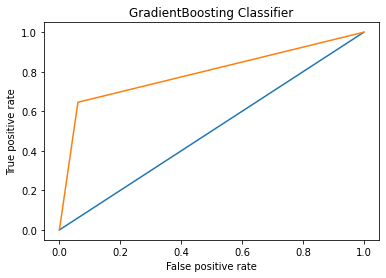

roc_auc_score =  0.7925112612612613


In [239]:
#Predictions with Gradient Boosting Classifier
y_prob = gbc.predict(x_test)
# Calculating false positive rate,true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Checking false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='GradientBoosting Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoosting Classifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_prob))

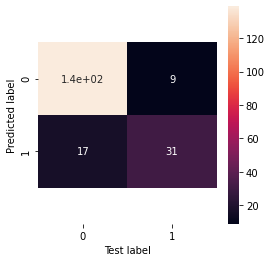

In [240]:
#Confusion matrix using Heatmap for Predicted & Test Labels 
def plotcm(y_test, gbc_pred):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, gbc_pred),annot=True)
    plt.xlabel("Test label")
    plt.ylabel("Predicted label")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plotcm(y_test, gbc_pred)

In [241]:
#Now check & print predicted values
result=pd.DataFrame(data=y_test)
result['Predicted values']=gbc_pred
result

,fraud_reported,Predicted values
310,1,1
687,0,1
308,0,0
5,1,0
967,1,1
...,...,...
468,0,0
230,0,0
361,1,1
416,0,0


In [242]:
#lets make the dataframe for Predictions using Pandas
predict=pd.DataFrame(gbc_pred,columns=['Predicted Values'])
predict=pd.concat([predict,y_test.reset_index()['fraud_reported']],axis=1)
predict.columns=['Predicted Values','Real Values']
#Comparing predicted and real values
predict.round(2)

,Predicted Values,Real Values
0,1,1
1,1,0
2,0,0
3,0,1
4,1,1
...,...,...
191,0,0
192,0,0
193,1,1
194,0,0


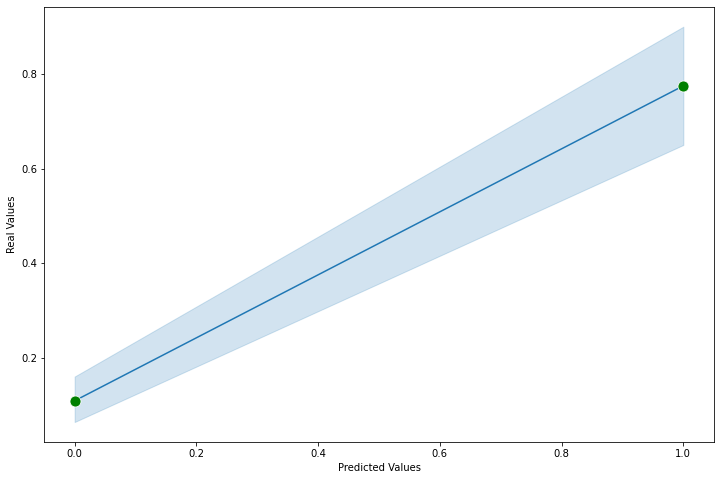

In [243]:
#Graph showing how close are predicted and Real Values
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(12,8))
sns.lineplot(x='Predicted Values',y='Real Values',data=predict,ax=ax,marker='o',markerfacecolor='green',markersize=11)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Real Values')
plt.show()

Conclusion:

1-Above Plot shows Predicted values are very close to real values.

2- Gradient Boosting Classifier is best algorithm for our Project.

# Saving our model

In [244]:
#Saving our Model using joblib
import joblib
joblib.dump(gbc,'Insurance Claims- Fraud Detection.pkl')

['Insurance Claims- Fraud Detection.pkl']

# Loading the saved model

In [245]:
gbc_from_joblib=joblib.load('Insurance Claims- Fraud Detection.pkl')
joblib_y_pred = gbc_from_joblib.predict(x_test)
final_calc(y_test, joblib_y_pred)

Accuracy is: 87.0 %
Precision is: 0.78
Recall is: 0.65
F1 score is: 0.7
Log Loss is : 4.581711135941579


{'accuracy': 0.87, 'Precision': 0.78, 'Recall': 0.65, 'F1 Score': 0.7}

In [246]:
#checking predicted values
print(joblib_y_pred)

[1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0]


Result is OK as per our model.

# ||HAPPY ENDING||